In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from scipy import stats

In [2]:
filenames = glob("data/interim/df_*.csv")
dataframes = [pd.read_csv(f, encoding='latin-1') for f in filenames]

In [3]:
for i in range(17):
    dataframes[i] = dataframes[i].drop('Unnamed: 0', axis=1)

In [4]:
# get all stories
# x = points
# y = descendants
# dist plot of x
# dist plot of y
# scatter plot
# url vs text


In [5]:
stories = pd.concat([df[df.type == "story"] for df in dataframes])

In [6]:
scores = stories["score"]
descendants = stories["descendants"]

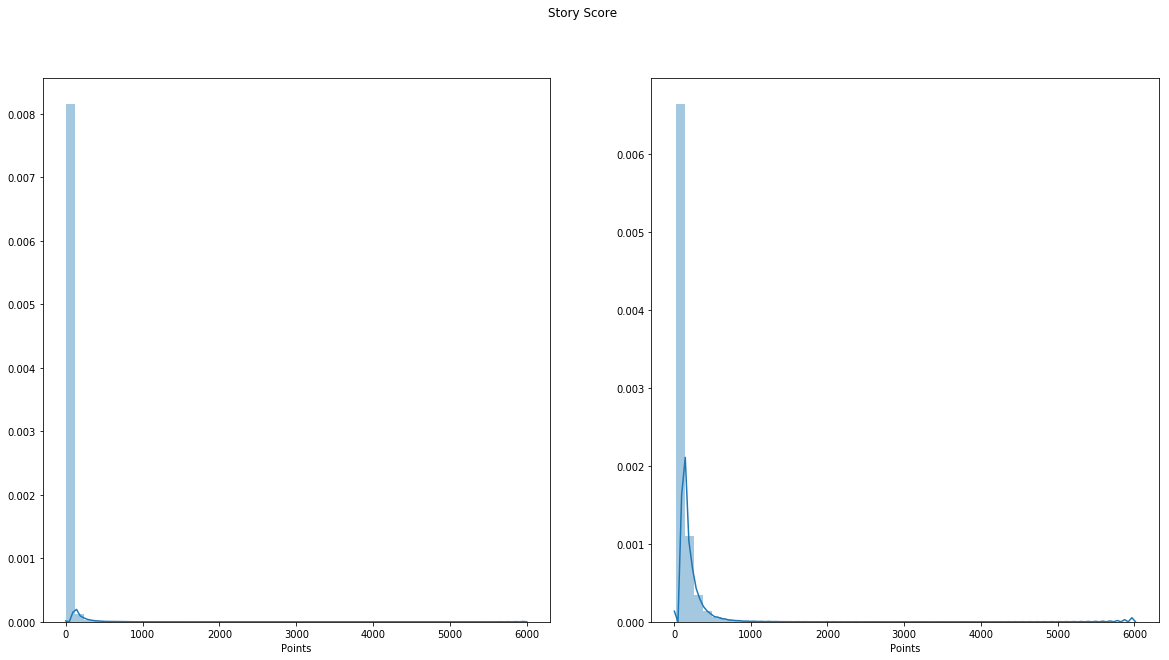

In [7]:
plt.figure(figsize=(20,10))
plt.suptitle("Story Score")
plt.subplot(121)

sns.distplot(scores.dropna())
plt.xlabel("Points")


plt.subplot(122)

sns.distplot(scores[scores > 20])
plt.xlabel("Points")
plt.show()

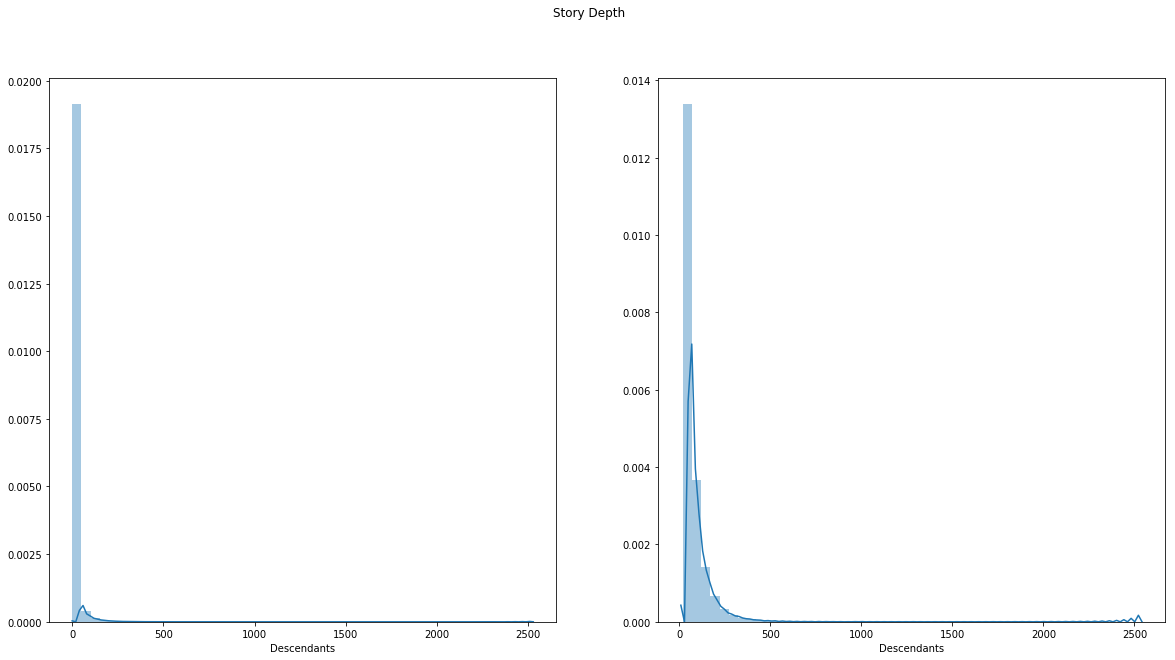

In [8]:
plt.figure(figsize=(20,10))
plt.suptitle("Story Depth")
plt.subplot(121)

sns.distplot(descendants.dropna())
plt.xlabel("Descendants")


plt.subplot(122)

sns.distplot(descendants[descendants > 20])
plt.xlabel("Descendants")
plt.show()

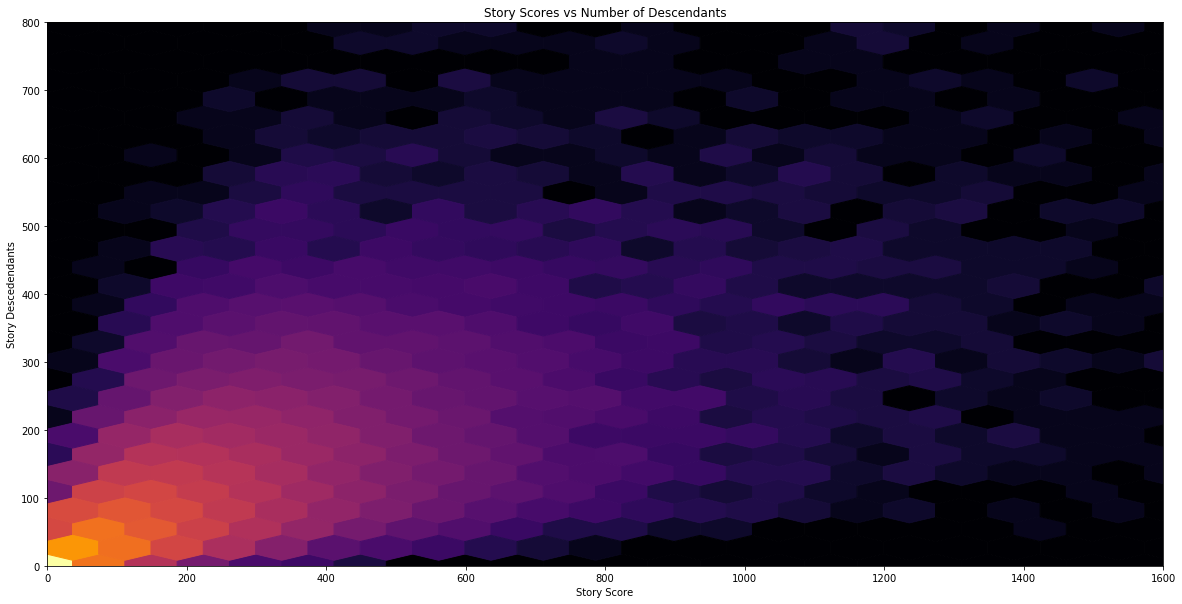

In [9]:
# too many data points for a scatter plot, better off with a hexbin plot
plt.figure(figsize=(20,10))
plt.title("Story Scores vs Number of Descendants")

plt.hexbin(scores, descendants, gridsize=80, bins='log', cmap='inferno')
plt.axis([0, 1600, 0, 800])
plt.xlabel("Story Score")
plt.ylabel("Story Descedendants")

plt.show()

In [10]:
# Pearson Correlation. Variables can be considered continuous
stats.pearsonr(scores.fillna(0),descendants.fillna(0))

(0.8144458204084767, 0.0)

In [11]:
show = stories[stories.title.str.contains("Show HN").fillna(False)]
ask = stories[stories.title.str.contains("Ask HN").fillna(False)]
links = stories[~(stories.title.str.contains("Ask HN|Show HN").fillna(False))]

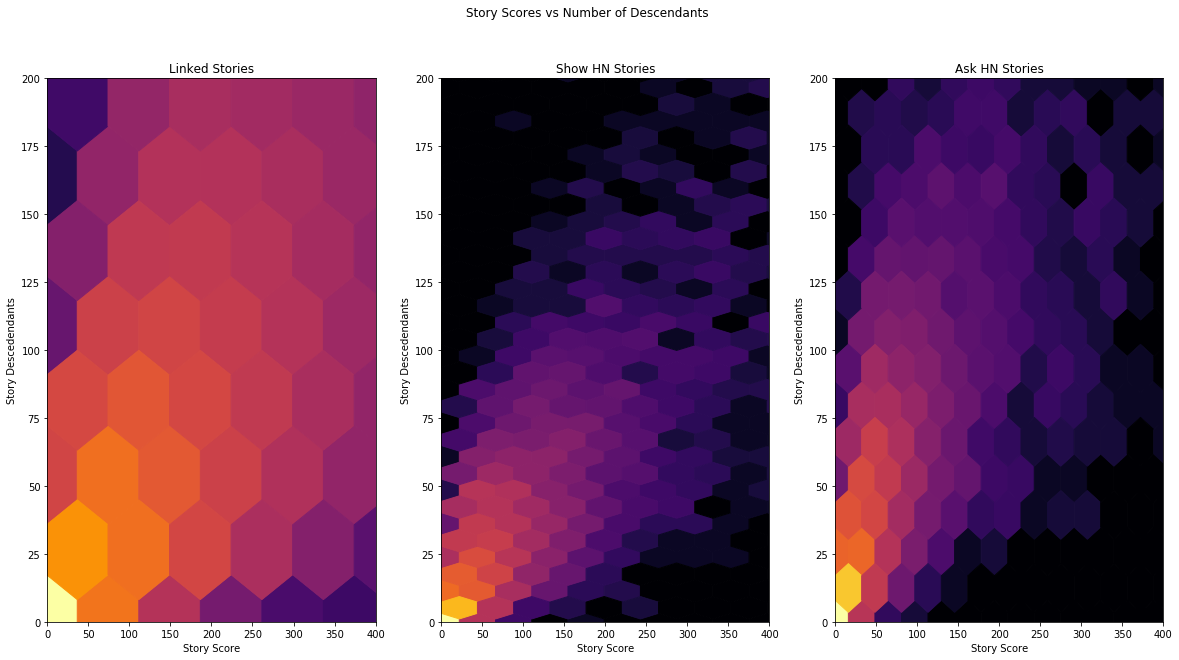

In [19]:
plt.figure(figsize=(20,10))
plt.suptitle("Story Scores vs Number of Descendants")

plt.subplot(131)
plt.title("Linked Stories")
plt.hexbin(links["score"], links["descendants"], gridsize=80, bins='log', cmap='inferno')
plt.axis([0, 400, 0, 200])
plt.xlabel("Story Score")
plt.ylabel("Story Descedendants")


plt.subplot(132)
plt.title("Show HN Stories")
plt.hexbin(show["score"], show["descendants"], gridsize=80, bins='log', cmap='inferno')
plt.axis([0, 400, 0, 200])
plt.xlabel("Story Score")
plt.ylabel("Story Descedendants")

plt.subplot(133)
plt.title("Ask HN Stories")
plt.hexbin(ask["score"], ask["descendants"], gridsize=80, bins='log', cmap='inferno')
plt.axis([0, 400, 0, 200])
plt.xlabel("Story Score")
plt.ylabel("Story Descedendants")

plt.show()

In [20]:
stats.pearsonr(links["score"].fillna(0),links["descendants"].fillna(0))

(0.8223889092908953, 0.0)

In [13]:
stats.pearsonr(show["score"].fillna(0),show["descendants"].fillna(0))

(0.8132572753269687, 0.0)

In [14]:
stats.pearsonr(ask["score"].fillna(0), ask["descendants"].fillna(0))

(0.8066141033042767, 0.0)

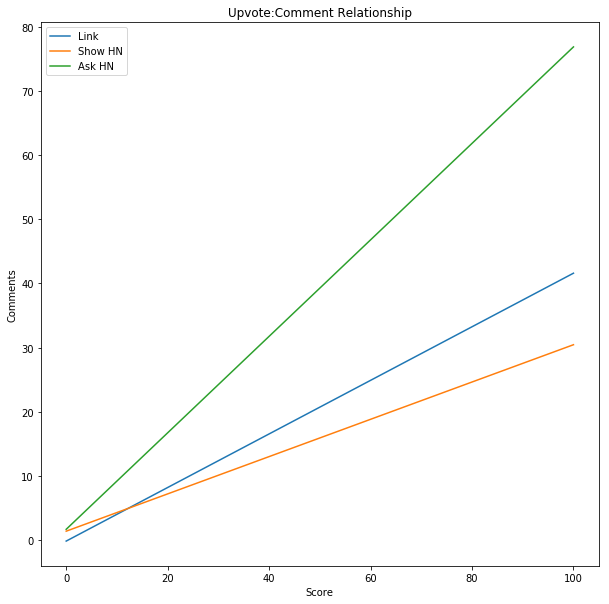

In [45]:
plt.figure(figsize=(10,10))
plt.title("Upvote:Comment Relationship")
x = [0, 100]

m, b = np.polyfit(x=links["score"].fillna(0), y=links["descendants"].fillna(0), deg=1)
y = [m * x + b for x in x]
plt.plot(x, y, label="Link")

m, b = np.polyfit(x=show["score"].fillna(0), y=show["descendants"].fillna(0), deg=1)
y = [m * x + b for x in x]
plt.plot(x, y, label="Show HN")

m, b = np.polyfit(x=ask["score"].fillna(0), y=ask["descendants"].fillna(0), deg=1)
y = [m * x + b for x in x]
plt.plot(x, y, label="Ask HN")

plt.xlabel("Score")
plt.ylabel("Comments")

plt.legend(loc="best")

plt.show()